## Setup & Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load datasets
df_badminton = pd.read_csv('reviews_badminton.csv')
df_badminton

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [3]:
# Quick inspection
print("Badminton shape:", df_badminton.shape)
print("\nColumns:")
print(df_badminton.columns.tolist())
print("\nFirst 5 rows:")
df_badminton.head()

Badminton shape: (8518, 8)

Columns:
['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes', 'Down Votes', 'Month', 'Review text', 'Ratings']

First 5 rows:


,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


## EDA & Business Insights

In [4]:
# Check data info
df_badminton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [5]:
# Missing values
print(df_badminton.isnull().sum())

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64


In [6]:
# droping rows having null values in Review text features
df_badminton = df_badminton.dropna(subset=['Review text'])
df_badminton.shape

(8510, 8)

In [7]:
# Check Duplicates
print("Duplicate reviews:", df_badminton['Review text'].duplicated().sum())
df_badminton[df_badminton['Review text'].duplicated(keep=False)].tail(25)

Duplicate reviews: 3527


,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8367,Aben Tsopoe,Terrific,"Certified Buyer, New Delhi",0.0,0.0,Mar 2017,NiceREAD MORE,4
8369,Bagadi ganapathi Rao,Mind-blowing purchase,NaN,0.0,0.0,Mar 2017,goodREAD MORE,4
8371,Divakar A,Terrific,"Certified Buyer, Chennai",0.0,0.0,Mar 2017,Good ProductREAD MORE,4
8373,sreekumar l,Nice product,"Certified Buyer, Chennai",0.0,0.0,Mar 2017,Not goodREAD MORE,3
8380,Nagaraj Walikar,Just wow!,"Certified Buyer, Pune",0.0,0.0,Mar 2017,ThanksREAD MORE,2
8381,Flipkart Customer,Excellent,NaN,0.0,0.0,Feb 2017,SuperREAD MORE,5
8385,Prudhvi Raj,Just wow!,"Certified Buyer, Bellampalli",0.0,0.0,Feb 2017,NiceREAD MORE,5
8387,Rajeev Gupta,Delightful,"Certified Buyer, Thane",0.0,0.0,Feb 2017,good oneREAD MORE,5
8389,Mohnish Jindal,Super!,"Certified Buyer, Mumbai",0.0,0.0,Feb 2017,Nice productREAD MORE,4
8391,Sudeep Syamnath,Finally an original version,"Certified Buyer, Bengaluru",0.0,0.0,Feb 2017,NiceREAD MORE,5


In [8]:
# Remove Duplicate Reviews - 
# Duplicate reviews can cause data leakage and bias the model, so I removed them to ensure fair evaluation and better generalization.
df_badminton = df_badminton.drop_duplicates(subset=['Review text'])
print("Duplicate reviews:", df_badminton['Review text'].duplicated().sum())
print("After Removing Duplicates:", df_badminton.shape)

Duplicate reviews: 0
After Removing Duplicates: (4983, 8)


In [9]:
# Conflict Ratings count
# find conflicts
conflicts = df_badminton.groupby('Review text')['Ratings'].nunique()
conflicts = conflicts[conflicts > 1].index

print("Conflicting reviews:", len(conflicts))

Conflicting reviews: 0


In [10]:
# Rating distribution
df_badminton['Ratings'].value_counts().sort_index()

Ratings
1     648
2     246
3     391
4     866
5    2832
Name: count, dtype: int64

In [11]:
df_badminton['Ratings'].value_counts().sort_values(ascending = False)/len(df_badminton['Ratings'])*100
# Observed imbalanceness in dataset

Ratings
5    56.833233
4    17.379089
1    13.004214
3     7.846679
2     4.936785
Name: count, dtype: float64

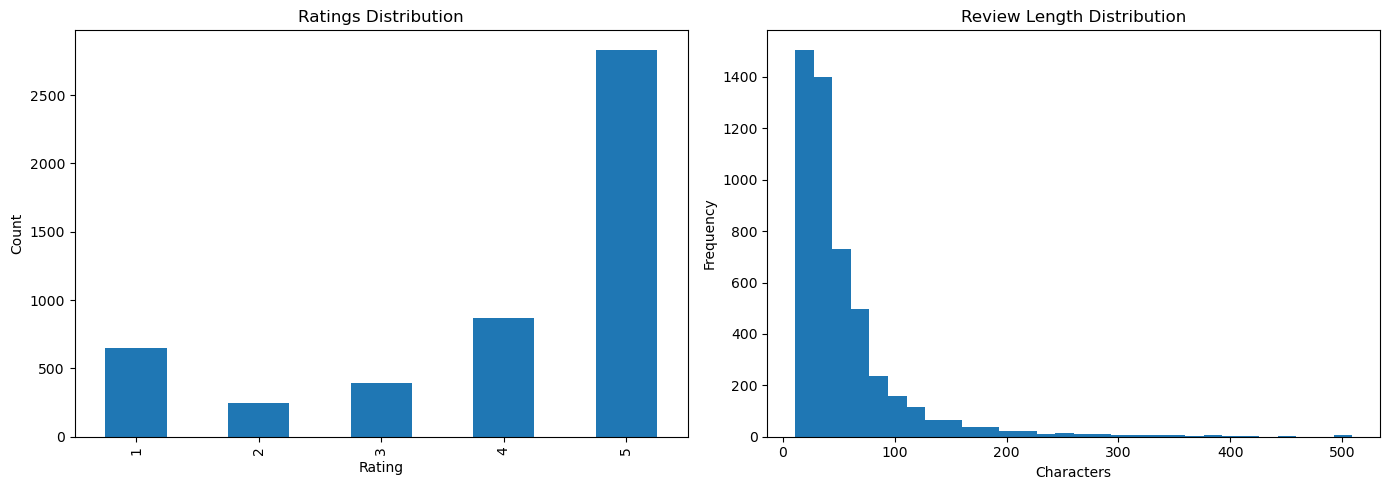

In [12]:
# Visual Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Plot 1: Ratings distribution ---
df_badminton['Ratings'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_title("Ratings Distribution")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Count")


# --- Plot 2: Review length distribution ---
review_length = df_badminton['Review text'].astype(str).apply(len)

axes[1].hist(review_length, bins=30)
axes[1].set_title("Review Length Distribution")
axes[1].set_xlabel("Characters")
axes[1].set_ylabel("Frequency")


plt.tight_layout()
plt.show()

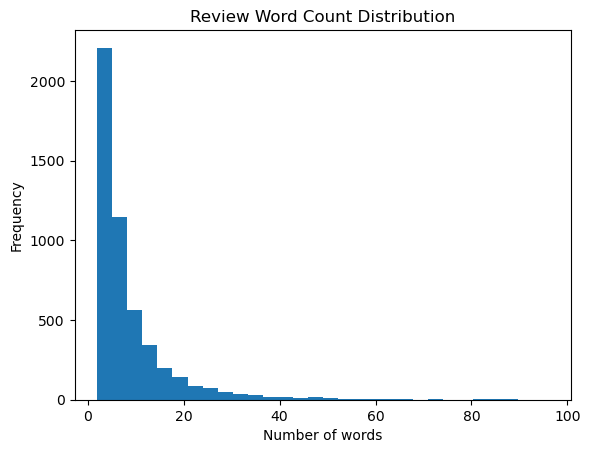

In [13]:
# --- Plot 3: Review Words distribution ---
word_count = df_badminton['Review text'].astype(str).apply(lambda x: len(x.split()))

plt.hist(word_count, bins=30)
plt.title("Review Word Count Distribution")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

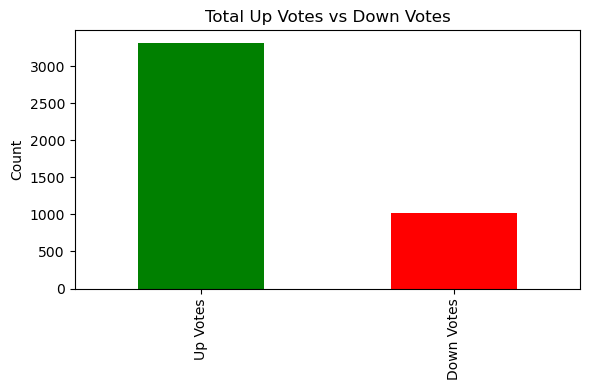

In [14]:
# Up votes vs Down votes
votes_data = df_badminton[['Up Votes', 'Down Votes']].sum()

plt.figure(figsize=(6,4))
votes_data.plot(kind='bar', color=['green', 'red'])

plt.title('Total Up Votes vs Down Votes')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [15]:
#Sample check positive and negative reviews
df_badminton.sample(5)[['Ratings', 'Review text']]

,Ratings,Review text
4369,5,"Superb, original quality.READ MORE"
6512,3,good product but lost 2 shuttles in 5 days not...
2516,5,It's original oneREAD MORE
7497,5,Fast deliveryOriginal productReasonable priceR...
515,3,It will become damaged after two gamesREAD MORE


In [16]:
# Findings of READ MORE in texts
df_badminton['Review text'][402]

'Product is good,but price costlyREAD MORE'

## Text Preprocessing

In [17]:
# Imports for Preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [18]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aliasgar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Aliasgar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aliasgar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aliasgar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Aliasgar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
# Create new dataframe
df = df_badminton.copy()
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8505,MD. Jabbar,Very Good,NaN,1.0,0.0,Sep 2016,Delivered before time but price is high from m...,3
8506,Abani Behera,Don't waste your money,NaN,0.0,2.0,Sep 2016,up to the mark but same is available in market...,4
8507,vishnu varma,Really Nice,"Certified Buyer, Agartala",0.0,1.0,Sep 2016,Nice delivery speedREAD MORE,5
8508,NaN,NaN,NaN,NaN,NaN,NaN,No complaints about the item . Its the best on...,5


In [20]:
# Rechecking for null values in column 'Review text' before preprocesing of Text data
df.isnull().sum()

Reviewer Name        2
Review Title         2
Place of Review     36
Up Votes             2
Down Votes           2
Month              271
Review text          0
Ratings              0
dtype: int64

In [21]:
# Create sentiment label
# Positive: Ratings 4-5, Negative: Rating 1-2 (Drop 3 - neutral)
df = df[df['Ratings'] != 3].copy()
df['Sentiment'] = df['Ratings'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')
df['Sentiment_Label'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0})

print("Class distribution:")
print(df['Sentiment'].value_counts())

Class distribution:
Sentiment
Positive    3698
Negative     894
Name: count, dtype: int64


In [22]:
# Text cleaning function
def clean_text(text):
    """
    Clean review text:
    - Lowercase
    - Remove special characters & numbers
    - Remove extra spaces
    """
    if pd.isna(text):
        return ""
    
    text = str(text).lower()
    text = text.replace("read more", " ")
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special chars & numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    
    return text

In [23]:
# Lemmatization function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Full preprocessing:
    - Clean text
    - Remove stopwords
    - Lemmatization
    """
    # Clean
    text = clean_text(text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords & lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

In [24]:
# Apply preprocessing
df['Cleaned_Review'] = df['Review text'].apply(clean_text)
df['Processed_Review'] = df['Review text'].apply(preprocess_text)

In [25]:
# Check before/after
print("ORIGINAL:")
print(df['Review text'].iloc[402])
print("\nCLEANED:")
print(df['Cleaned_Review'].iloc[402])
print("\nPROCESSED:")
print(df['Processed_Review'].iloc[402])

ORIGINAL:
The bestREAD MORE

CLEANED:
the best

PROCESSED:
best


In [26]:
# Check before/after (one more recheck)
print("ORIGINAL:")
print(df['Review text'].iloc[408])
print("\nCLEANED:")
print(df['Cleaned_Review'].iloc[408])
print("\nPROCESSED:")
print(df['Processed_Review'].iloc[408])

ORIGINAL:
Ok goodREAD MORE

CLEANED:
ok good

PROCESSED:
ok good


In [27]:
# Create DataFrame
df_final = df[['Review text', 'Cleaned_Review', 'Processed_Review', 'Ratings', 'Sentiment', 'Sentiment_Label']]

In [29]:
df_final.isna().sum()

Review text         0
Cleaned_Review      0
Processed_Review    0
Ratings             0
Sentiment           0
Sentiment_Label     0
dtype: int64

In [30]:
# Check Duplicates in column Processed_Review before moving dataset for ML operations.
print("Duplicate Processed reviews:", df_final['Processed_Review'].duplicated().sum())
df_final[df_final['Processed_Review'].duplicated(keep=False)].tail(25)

Duplicate Processed reviews: 882


,Review text,Cleaned_Review,Processed_Review,Ratings,Sentiment,Sentiment_Label
8118,The product quality was very good.READ MORE,the product quality was very good,product quality good,5,Positive,1
8122,Got the genuine product.READ MORE,got the genuine product,got genuine product,4,Positive,1
8131,Nice product..READ MORE,nice product,nice product,5,Positive,1
8138,very bad quality 👎👎👎👎👎👎👎👎👎👎READ MORE,very bad quality,bad quality,1,Negative,0
8141,Good product by flipkartREAD MORE,good product by flipkart,good product flipkart,4,Positive,1
8145,gudREAD MORE,gud,gud,5,Positive,1
8154,It's much good.READ MORE,its much good,much good,5,Positive,1
8180,Very good product nice...@READ MORE,very good product nice,good product nice,5,Positive,1
8183,"Nice product, go for it.READ MORE",nice product go for it,nice product go,4,Positive,1
8192,Excellent againREAD MORE,excellent again,excellent,4,Positive,1


In [31]:
# Remove Duplicates from Preprocessed Review columns
df_final = df_final.drop_duplicates(subset=['Processed_Review'])

In [31]:
#Saving data for ML Ops
df_final.to_csv('preprocessed_reviews.csv', index=False)
print("\n✅ Preprocessed data saved!")
print(f"Final dataset shape: {df_final.shape}")


✅ Preprocessed data saved!
Final dataset shape: (3710, 6)


In [32]:
df_final.Processed_Review.describe()

count                                                  3710
unique                                                 3710
top       nice product good quality price rising bad sig...
freq                                                      1
Name: Processed_Review, dtype: object

In [33]:
#Checking imbalnceness in target variable %
df_final['Sentiment_Label'].value_counts()/len(df_final['Sentiment_Label'])*100

Sentiment_Label
1    79.002695
0    20.997305
Name: count, dtype: float64

In [34]:
#Checking imbalnceness in target variable
df_final['Sentiment_Label'].value_counts()

Sentiment_Label
1    2931
0     779
Name: count, dtype: int64